In [25]:
%matplotlib inline
from numpy import array, linspace ; from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show
import matplotlib
import matplotlib.pyplot as plt
# synthesize some data 
font = {
    'family' : 'normal',
    'weight':'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
import seaborn as sns
pallete = sns.color_palette("Set2", 4)
pallete

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)]

In [26]:
# fig = plt.figure()
fig = plt.figure(figsize=(8, 16), dpi=80)
# fig = plt.figure(figsize=((14,14)))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# print(ax1,ax2)
# rects1 = ax1.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax1.bar(x + width/2, women_means, width, label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax1.set_ylabel('Scores')
# ax1.set_title('Scores by group and gender')
# ax1.set_xticks(x, labels)
# # ax1.legend()

# # ax.bar_label(rects1, padding=3)
# # ax.bar_label(rects2, padding=3)

# # fig.tight_layout()

# rects1 = ax2.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax2.bar(x + width/2, women_means, width, label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax1.set_ylabel('Scores')
# ax2.set_title('Scores by group and gender')
# ax2.set_xticks(x, labels)
# ax2.legend()

# # ax.bar_label(rects1, padding=3)
# # ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()

<Figure size 640x1280 with 0 Axes>

In [27]:
import pandas
df = pandas.read_csv('batch_var_quiver.csv',',', header = 0)
# val = df['0'].values[0]
# val
# len(df.columns)
df
# color_and_shape = df.loc[(df['Dataset'] == 'ogbn-products') & (df['System'] == 'Quiver')]
# color_and_shape['10']
# color_and_shape['0'].item()

,Dataset,Batch Size,1024,4096,16384,1024.1,4096.1,16384.1
0,ogbn-products,DGL,50.088,23.234,6.856,50.469,24.071,7.601
1,ogbn-products,Quiver,43.121,13.150,3.097,28.623,6.152,2.613
2,ogbn-products,Groot,8.190,2.570,0.680,20.410,5.870,1.970
3,reorder-papers100M,DGL,149.192,54.874,26.111,163.163,58.329,29.001
4,reorder-papers100M,Quiver,199.115,26.569,8.267,203.786,44.984,17.053
5,reorder-papers100M,Groot,34.980,11.150,4.060,92.500,29.050,9.680
6,amazon,DGL,221.168,77.744,27.520,225.422,80.162,28.452
7,amazon,Quiver,161.266,28.039,8.238,201.866,45.204,13.240
8,amazon,Groot,59.980,10.880,3.420,95.480,27.640,9.400


/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/usr/lib/python3/dist-packages/ipykernel_launcher.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


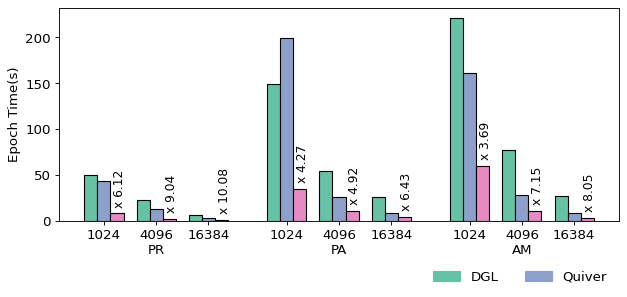

In [28]:
N = 2
import numpy as np
ind = np.arange(N) 
width = 0.25
fig = plt.figure(figsize=(8,4), dpi=80)

# fig = plt.figure(figsize=(6, 7))
# plt.show()
batch_per = ['1024','4096','16384']
dataset = ['ogbn-products','reorder-papers100M','amazon']
dataset_label = ['PR','PA','AM']
n_vals = []
q_vals = []
r_vals = []
x_q_vals = []
x_r_vals = []
x_n_vals = []
x_tick = []
x_tick_val = []
speedups = []
count = 0
for d_i,d in enumerate(dataset):
    for batch in batch_per:
        row = df.loc[(df['Dataset'] == d) & (df['Batch Size'] == 'DGL')]
        n_vals.append(row[batch].item())
        x_n_vals.append(count)
        row = df.loc[(df['Dataset'] == d) & (df['Batch Size'] == 'Quiver')]
        q_vals.append(row[batch].item())
        x_q_vals.append(count + width)
        row = df.loc[(df['Dataset'] == d) & (df['Batch Size'] == 'Groot')]
        r_vals.append(row[batch].item())
        x_r_vals.append(count + width * 2)
        
        plt.text(count + width * 2.2, r_vals[-1] + width * 40,'x {:.2f}'.\
                     format(n_vals[-1]/ r_vals[-1]), ha = 'center', \
                 rotation = 90, FontSize=11)  
        x_tick.append(count + width)
#         speedups.append('x1')
        if batch =='4096':
            x_tick_val.append(batch + "\n" +dataset_label[d_i])
        else:
            x_tick_val.append(batch)
        count = count + width * 4
    count = count + width * 2 
# print(x_q_vals, q_vals) 

bar1 = plt.bar(x_n_vals, n_vals, width, color = pallete[0], edgecolor='black')  
bar2 = plt.bar(x_q_vals, q_vals, width, color = pallete[2], edgecolor='black')
bar3 = plt.bar(x_r_vals, r_vals, width, color=pallete[3], edgecolor='black')
# print(bar1)
# plt.xlabel("\nDataset ")
plt.ylabel('Epoch Time(s)')
# plt.title("Graph Sage")

# plt.text(.25,12,1)  
# plt.text(2,0,1)  
# plt.text(4,0,1)  



plt.xticks(x_tick, x_tick_val)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color=pallete[0], label='DGL',lw=1., edgecolor='black')
red_patch1 = mpatches.Patch(color=pallete[2], label='Quiver',lw=1., edgecolor='black')
# red_patch2 =  mpatches.Patch(color=pallete[2], label='GSplit')
plt.legend(handles=[ red_patch, red_patch1],ncol=2, loc="lower right",bbox_to_anchor=  (1, -0.35), frameon=False)

# plt.legend((bar1, bar2, bar3), 
#                ('DGL', 'PaGraph', 'GSplit'))

plt.tight_layout()
plt.savefig('quiver_batch_sage.pdf')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/usr/lib/python3/dist-packages/ipykernel_launcher.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


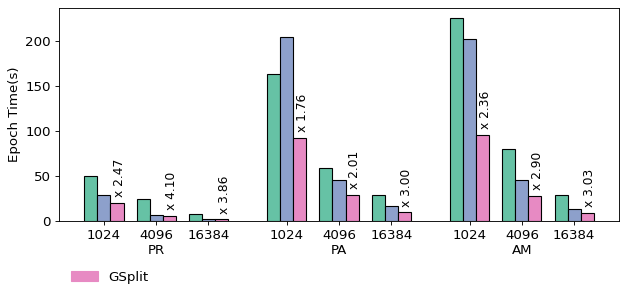

In [29]:
N = 2
import numpy as np
ind = np.arange(N) 
width = 0.25
fig = plt.figure(figsize=(8,4), dpi=80)

# fig = plt.figure(figsize=(6, 7))
# plt.show()
batch_per = ['1024','4096','16384']
dataset = ['ogbn-products','reorder-papers100M','amazon']
dataset_label = ['PR','PA','AM']
n_vals = []
q_vals = []
r_vals = []
x_q_vals = []
x_r_vals = []
x_n_vals = []
x_tick = []
x_tick_val = []
speedups = []
count = 0
for d_i,d in enumerate(dataset):
    for batch in batch_per:
        row = df.loc[(df['Dataset'] == d) & (df['Batch Size'] == 'DGL')]
        n_vals.append(row[batch+'.1'].item())
        x_n_vals.append(count)
        row = df.loc[(df['Dataset'] == d) & (df['Batch Size'] == 'Quiver')]
        q_vals.append(row[batch+'.1'].item())
        x_q_vals.append(count + width)
        row = df.loc[(df['Dataset'] == d) & (df['Batch Size'] == 'Groot')]
        r_vals.append(row[batch+'.1'].item())
        x_r_vals.append(count + width * 2)
        
        plt.text(count + width * 2.2, r_vals[-1] + width * 40,'x {:.2f}'.\
                     format(n_vals[-1]/ r_vals[-1]), ha = 'center', \
                 rotation = 90, FontSize=11)  
        x_tick.append(count + width)
#         speedups.append('x1')
        if batch =='4096':
            x_tick_val.append(batch + "\n" +dataset_label[d_i])
        else:
            x_tick_val.append(batch)
        count = count + width * 4
    count = count + width * 2 
# print(x_q_vals, q_vals) 

bar1 = plt.bar(x_n_vals, n_vals, width, color = pallete[0],edgecolor='black')  
bar2 = plt.bar(x_q_vals, q_vals, width, color = pallete[2],edgecolor='black')
bar3 = plt.bar(x_r_vals, r_vals, width, color=pallete[3],edgecolor='black')
# print(bar1)
# plt.xlabel("\nDataset ")
plt.ylabel('Epoch Time(s)')
# plt.title("Graph Sage")

# plt.text(.25,12,1)  
# plt.text(2,0,1)  
# plt.text(4,0,1)  



plt.xticks(x_tick, x_tick_val)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color=pallete[0], label='DGL',edgecolor='black')
red_patch1 = mpatches.Patch(color=pallete[1], label='Quiver')
red_patch2 =  mpatches.Patch(color=pallete[3], label='GSplit',lw=1., edgecolor='black')
plt.legend(handles=[ red_patch2],ncol=2, loc="lower left",bbox_to_anchor= (0,-.35), frameon=False,edgecolor='black')

# plt.legend((bar1, bar2, bar3), 
#                ('DGL', 'PaGraph', 'GSplit'))

plt.tight_layout()
plt.savefig('quiver_batch_gat.pdf')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


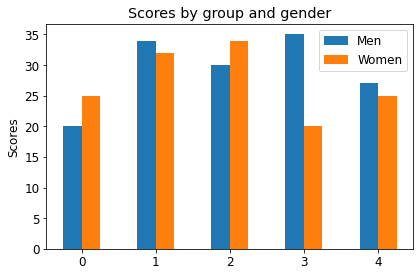

In [30]:

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()